In [7]:
%qtconsole

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_products = pd.read_csv('data/rest_1_products.csv')
df_orders = pd.read_csv('data/rest_1_orders.csv')

In [4]:
def heure(date):
    return int(date.split(' ')[1][0:2])
df_orders['Hour'] = df_orders['Order Date'].apply(heure)

In [18]:
df_orders.head()
#df_orders.describe()
# row_index_to_select = [i for i in range(10)]
# df_orders.loc[row_index_to_select]

Order Number        Order Date            Item Name  Quantity  \
0         16118  03/08/2019 20:25        Plain Papadum         2   
1         16118  03/08/2019 20:25     King Prawn Balti         1   
2         16118  03/08/2019 20:25          Garlic Naan         1   
3         16118  03/08/2019 20:25        Mushroom Rice         1   
4         16118  03/08/2019 20:25  Paneer Tikka Masala         1   

   Product Price  Total products  Hour  
0           0.80               6    20  
1          12.95               6    20  
2           2.95               6    20  
3           3.95               6    20  
4           8.95               6    20

Les 10 plats les plus commandés

In [116]:
df = pd.DataFrame(columns=['Item Name', 'Count'])
item_names = df_orders.groupby('Item Name').groups
item_names = [e for e in item_names.keys()]
for item in item_names:
    df = df.append({'Item Name': item,'Count': len(df_orders[df_orders['Item Name'] == item])},ignore_index=True)
df = df.sort_values('Count',ascending=False)
df = df.head(10)
df.head(10)
# df['Item Name'] = df_orders.set_index('Item Name')
# df.head()
# favourite_dishes.agg('count')

Item Name Count
186            Pilau Rice  4721
187            Plain Naan  3753
188         Plain Papadum  3598
81            Garlic Naan  2628
165          Onion Bhajee  2402
189            Plain Rice  2369
52   Chicken Tikka Masala  2133
144         Mango Chutney  2070
16            Bombay Aloo  1752
185         Peshwari Naan  1535

In [119]:
ax = sns.boxplot(x="variable", y="value", data=df)
sns.set_palette("muted")
plt.setp(ax.get_xticklabels(), rotation=70)

ValueError: Could not interpret input 'variable'

In [86]:
len(df_orders[df_orders['Item Name'] == 'Plain Papadum'])

3598

In [6]:
group_by_dish = df_orders.groupby(by=['Item Name'])
df_orders.groupby(["Item Name"])["Hour"].mean()

Item Name
Aloo Chaat                    17.449123
Aloo Gobi                     18.160976
Aloo Methi                    18.409091
Baingan Hari Mirch            18.284264
Bengal Fish Biryani           18.921053
Bengal Fish Karahi            16.611111
Bengal Fry Fish               17.043478
Bengal King Prawn             17.445545
Bengal Salad                  17.492754
Bhindi Bhajee                 18.123404
Bhuna                         18.364754
Bhuna - Chicken               18.186869
Bhuna - Chicken Tikka         18.273438
Bhuna - King Prawn            17.263158
Bhuna - Lamb                  18.188525
Bhuna - Prawn                 18.208333
Bombay Aloo                   18.057648
Bottle Coke                   18.680000
Bottle Diet Coke              17.982143
Brinjal Bhajee                17.694030
Butter Chicken                18.243878
COBRA ( LARGE )               19.000000
COBRA (330ML)                 17.811765
COBRA (660ML)                 18.315789
Cauliflower Bhajee            

In [7]:
df_orders[df_orders['Item Name'] == 'Garlic Naan']['Order Date']

2        03/08/2019 20:25
45       03/08/2019 19:28
53       03/08/2019 19:26
125      03/08/2019 17:52
152      02/08/2019 19:33
174      02/08/2019 18:41
211      02/08/2019 14:11
245      01/08/2019 19:16
311      31/07/2019 19:35
324      31/07/2019 19:17
350      31/07/2019 13:55
356      30/07/2019 20:10
15529    28/07/2019 21:44
15532    28/07/2019 20:00
15533    28/07/2019 20:00
15543    28/07/2019 17:41
15547    28/07/2019 13:01
15552    27/07/2019 19:49
15559    27/07/2019 19:23
15564    27/07/2019 19:12
15575    27/07/2019 18:11
15580    27/07/2019 17:22
15583    27/07/2019 16:55
15585    26/07/2019 23:04
15595    26/07/2019 19:51
15607    26/07/2019 18:53
15620    25/07/2019 17:34
15623    24/07/2019 23:08
15627    24/07/2019 21:46
15629    24/07/2019 20:00
               ...       
29601    09/04/2016 16:35
29604    08/04/2016 19:24
29612    07/04/2016 18:56
29614    07/04/2016 18:38
29620    05/04/2016 21:22
29624    03/04/2016 18:23
29634    02/04/2016 19:31
29636    02/

In [8]:
dishes = {}
dishes_array = df_orders['Item Name'].unique()
for e in dishes_array:
    dish = df_orders[df_orders["Item Name"] == e]["Hour"]
    dishes[e] = {'avg' : dish.mean(),
                 'var' : dish.var(),
                 'count' : dish.count()}

In [9]:
popular_dishes_array = df_orders['Item Name'].value_counts().head(5).keys()
popular_dishes = {}
for e in popular_dishes_array:
    dish = df_orders[df_orders["Item Name"] == e]["Hour"]
    popular_dishes[e] = {'avg' : dish.mean(),
                         'var' : dish.var(),
                         'count' : dish.count()}

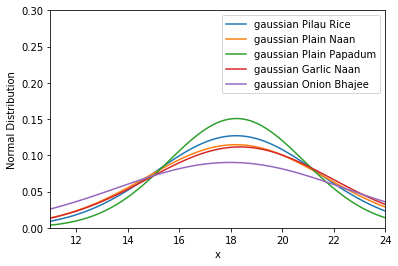

In [10]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

x_min = 11.0
x_max = 24
x = np.linspace(x_min, x_max, 100)

D = {}
for keys in popular_dishes:
    avg = popular_dishes[keys]['avg']
    var = popular_dishes[keys]['var']
    D['gaussian {}'.format(keys)] = scipy.stats.norm.pdf(x,avg,var)

plt.xlim(x_min,x_max)
plt.ylim(0,0.3)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution.png")

for keys in D:
    plt.plot(x,D[keys], label = keys)
    plt.legend()
#plt.show()

In [11]:
popular_dishes

{'Pilau Rice': {'avg': 18.20482948527854,
  'var': 3.140451247401639,
  'count': 4721},
 'Plain Naan': {'avg': 18.19690913935518,
  'var': 3.47907359968458,
  'count': 3753},
 'Plain Papadum': {'avg': 18.220678154530294,
  'var': 2.6457552252718926,
  'count': 3598},
 'Garlic Naan': {'avg': 18.358447488584474,
  'var': 3.5760725031417047,
  'count': 2628},
 'Onion Bhajee': {'avg': 17.981681931723564,
  'var': 4.424487299040335,
  'count': 2402}}

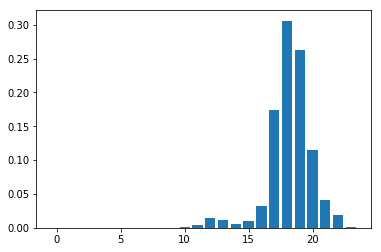

In [19]:
dish = df_orders[df_orders["Item Name"] == 'Pilau Rice'][["Quantity","Hour"]].groupby("Hour").agg(['count'])
dish_gr = dish.groupby('Hour')

hours = [e for e in dish_gr.groups.keys()]
counts = [e for e in dish['Quantity','count']]

total = sum(counts)
distribution = {}

for i in range(len(hours)):
    distribution['{}'.format(hours[i])]=counts[i]/total
for i in range(24):
    if i in hours:
        pass
    else:
        distribution['{}'.format(i)] = 0

import collections

dist = collections.OrderedDict(sorted(distribution.items()))

items = []
for key, value in dist.items():
    items.append([int(key),value])
items = sorted(items, key=lambda l: l[0])

x,y = [],[]
for e in items:
    x.append(e[0])
    y.append(e[1])
        
plt.bar(range(len(y)), y)
#plt.hist(y, bins = len(x))
plt.show()

In [21]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)


array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])